In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [3]:
# 2. Đọc file csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMP.csv')
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

data

,Unnamed: 0,time,open,high,low,close,volume,ticker
0,0,2014-01-02,10760,10790,10760,10790,2410,IMP
1,1,2014-01-03,10760,10840,10670,10840,13010,IMP
2,2,2014-01-06,10870,11560,10870,11540,55630,IMP
3,3,2014-01-07,11400,11540,11330,11540,20980,IMP
4,4,2014-01-08,11370,11830,11330,11800,43410,IMP
...,...,...,...,...,...,...,...,...
2462,2462,2023-12-04,54700,55500,54400,55300,24800,IMP
2463,2463,2023-12-05,55200,55200,54600,55000,10200,IMP
2464,2464,2023-12-06,55000,55200,54900,55200,26600,IMP
2465,2465,2023-12-07,54900,55900,54900,55200,29200,IMP


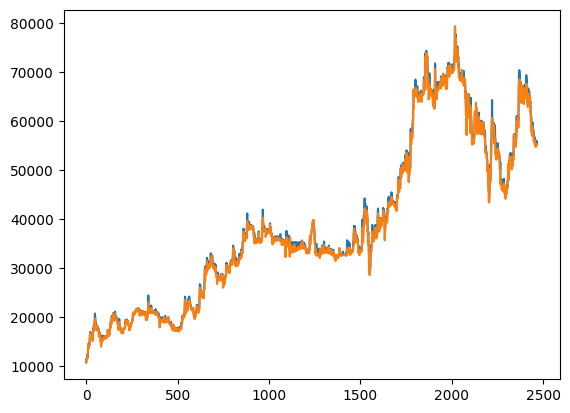

In [4]:
# 3. Gán biến
y = data[['close']] # chuỗi thời gian cần dự báo (biến phụ thuộc)
X = data[['high']] # các biến độc lập

plt.plot(X)
plt.plot(y)
plt.show()

In [5]:
# 4. Chia train, test
train_size = int(0.8 * len(data))
test_size = int(0.1 * len(data))
val_size = len(data) - train_size - test_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:train_size+test_size]
X_test = X[train_size:train_size+test_size]
y_val = y[train_size+test_size:]
X_val = X[train_size+test_size:]

In [6]:
# 5. Tạo mô hình SVR
svr_RBF = SVR(kernel='rbf', C=1000)
svr_RBF.fit(X_train, y_train)


SVR(C=1000)

In [7]:

# 6. Dự đoán giá đóng cửa trên tập kiểm tra
y_pred_RBF = svr_RBF.predict(X_test)
y_pred_RBF = y_pred_RBF.reshape(-1,1)
# Tập validate
y_pred_val_RBF = svr_RBF.predict(X_val)
y_pred_val_RBF = y_pred_val_RBF.reshape(-1,1)



In [8]:
# 7. Tính toán độ chính xác của mô hình
# Test
mae_RBF = mean_absolute_error(y_test, y_pred_RBF)
mape_RBF = mean_absolute_percentage_error(y_test, y_pred_RBF) * 100
r2_RBF = r2_score(y_test, y_pred_RBF)
test_rmse_RBF = np.sqrt(np.mean((y_pred_RBF - y_test)**2))
#Validate
mae_val_RBF = mean_absolute_error(y_val, y_pred_val_RBF)
mape_val_RBF = mean_absolute_percentage_error(y_val, y_pred_val_RBF) * 100
r2_val_RBF = r2_score(y_val, y_pred_val_RBF)
val_rmse_RBF = np.sqrt(np.mean((y_pred_val_RBF - y_val)**2))


In [9]:
# 8. In kết quả độ chính xác của mô hình
print("*********TEST**********")
print("RBF MAE:", mae_RBF)
print("RBF MAPE:", mape_RBF)
print("RBF R^2:",  r2_RBF)
print("RBF RMSE:", test_rmse_RBF)
print("*********VALIDATE**********")
print("RBF MAE:", mae_val_RBF)
print("RBF MAPE:", mape_val_RBF)
print("RBF R^2:",  r2_val_RBF)
print("RBF RMSE:", val_rmse_RBF)



*********TEST**********
RBF MAE: 1541.1522132923544
RBF MAPE: 2.3075122224876243
RBF R^2: 0.8806636167408393
RBF RMSE: close    2624.93936
dtype: float64
*********VALIDATE**********
RBF MAE: 583.491838652154
RBF MAPE: 1.0481562530083957
RBF R^2: 0.9877311718922971
RBF RMSE: close    748.118356
dtype: float64


In [10]:
# 9. Láy giá trị Close của ngày cuối cùng trong dataset
last_row = data.tail(1)
last_data = last_row['close'].values.reshape(-1,1)
last_index =  data.index[-1]
last_distance = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


In [11]:
# 10. Tạo mảng chứa giá trị predict của 30 ngày tiếp theo
y_next_30_day_RBF = []

# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    y_pred_next = svr_RBF.predict(last_data)
    y_next_30_day_RBF.append(y_pred_next)
    last_data = y_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", y_next_30_day_RBF)


Kết quả dự đoán sử dụng RBF: [array([54237.37762055]), array([53330.9377156]), array([52488.97911186]), array([51711.73072233]), array([50994.60033335]), array([50330.82589045]), array([49713.15518167]), array([49134.7283083]), array([48589.45341931]), array([48072.10622508]), array([47578.29726748]), array([47104.38589801]), array([46647.38027525]), array([46204.84100017]), array([45774.79498145]), array([45355.66090515]), array([44946.18546293]), array([44545.38875094]), array([44152.51720043]), array([43767.00264035]), array([43388.42642267]), array([43016.48786414]), array([42650.9765273]), array([42291.74805999]), array([41938.70343374]), array([41591.77147483]), array([41250.89458119]), array([40916.01748153]), array([40587.07883708]), array([40264.0054276])]


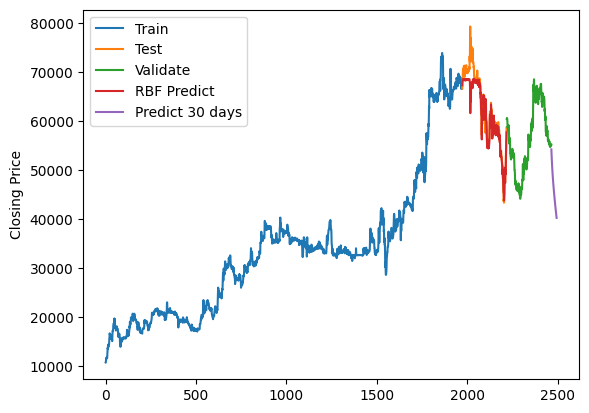

In [12]:
# 11. Vẽ mô hình
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_val, label='Validate')
plt.plot(X_test.index, y_pred_RBF, label='RBF Predict')
plt.plot(last_distance,y_next_30_day_RBF, label='Predict 30 days')
plt.ylabel('Closing Price')
plt.legend()
plt.show()